# Multiple Linear Regression
## Bike Sharing System

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Essentially, the company wants —

Which variables are significant in predicting the demand for shared bikes.

How well those variables describe the bike demands

## Reading and Understanding the Data
Let us import dataset 

In [78]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [79]:
# Importing Librarys 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# Load data from source file
bike = pd.read_csv("day.csv")

In [81]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [82]:
bike.shape

(730, 16)

In [83]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [84]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [85]:
#Check missing values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data set does not have missing values

EDA and Visualising the Data

Remove unwanted columns

In [86]:
bike.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)

 Data Processing

In [87]:
bike.season = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike.mnth = bike.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike.weekday = bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike.weathersit = bike.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})


In [88]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


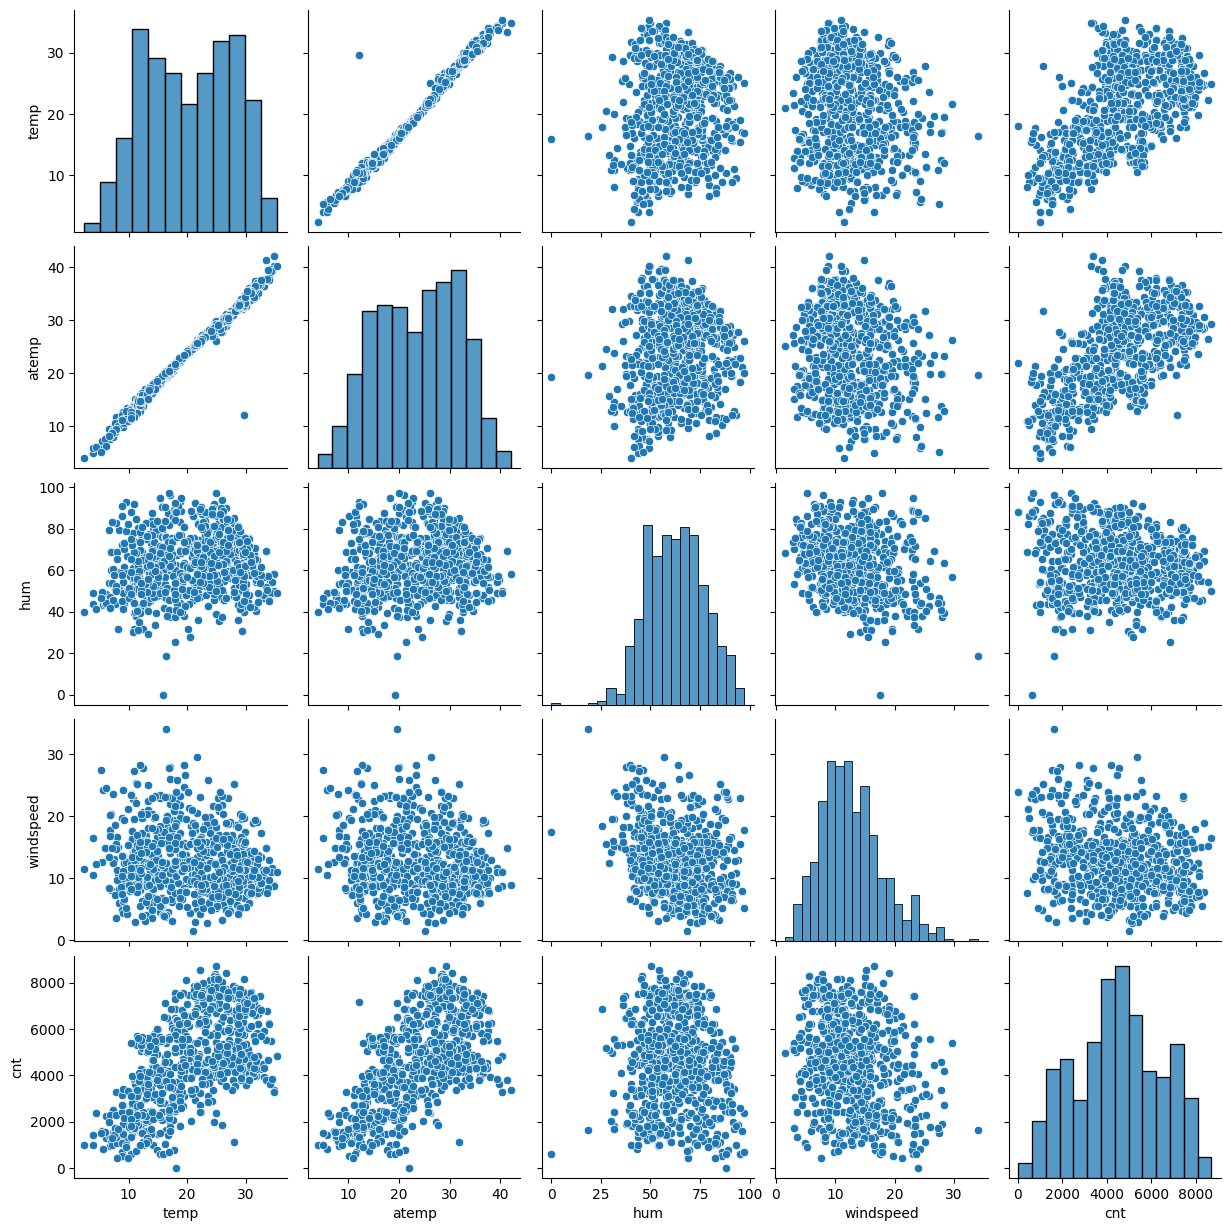

In [89]:
#Visualizing the Numerical variables
sns.pairplot(data=bike, vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

### Observations:
1. temp and atemp: These variables are highly correlated, showing a strong linear relationship.
2. temp and atemp have Positive correlation exists. As temperature increases, the count (cnt) also tends to increase.
3. hum and windspeed are variables show a weak or no clear relationship with the count. The scatter plots appear dispersed.


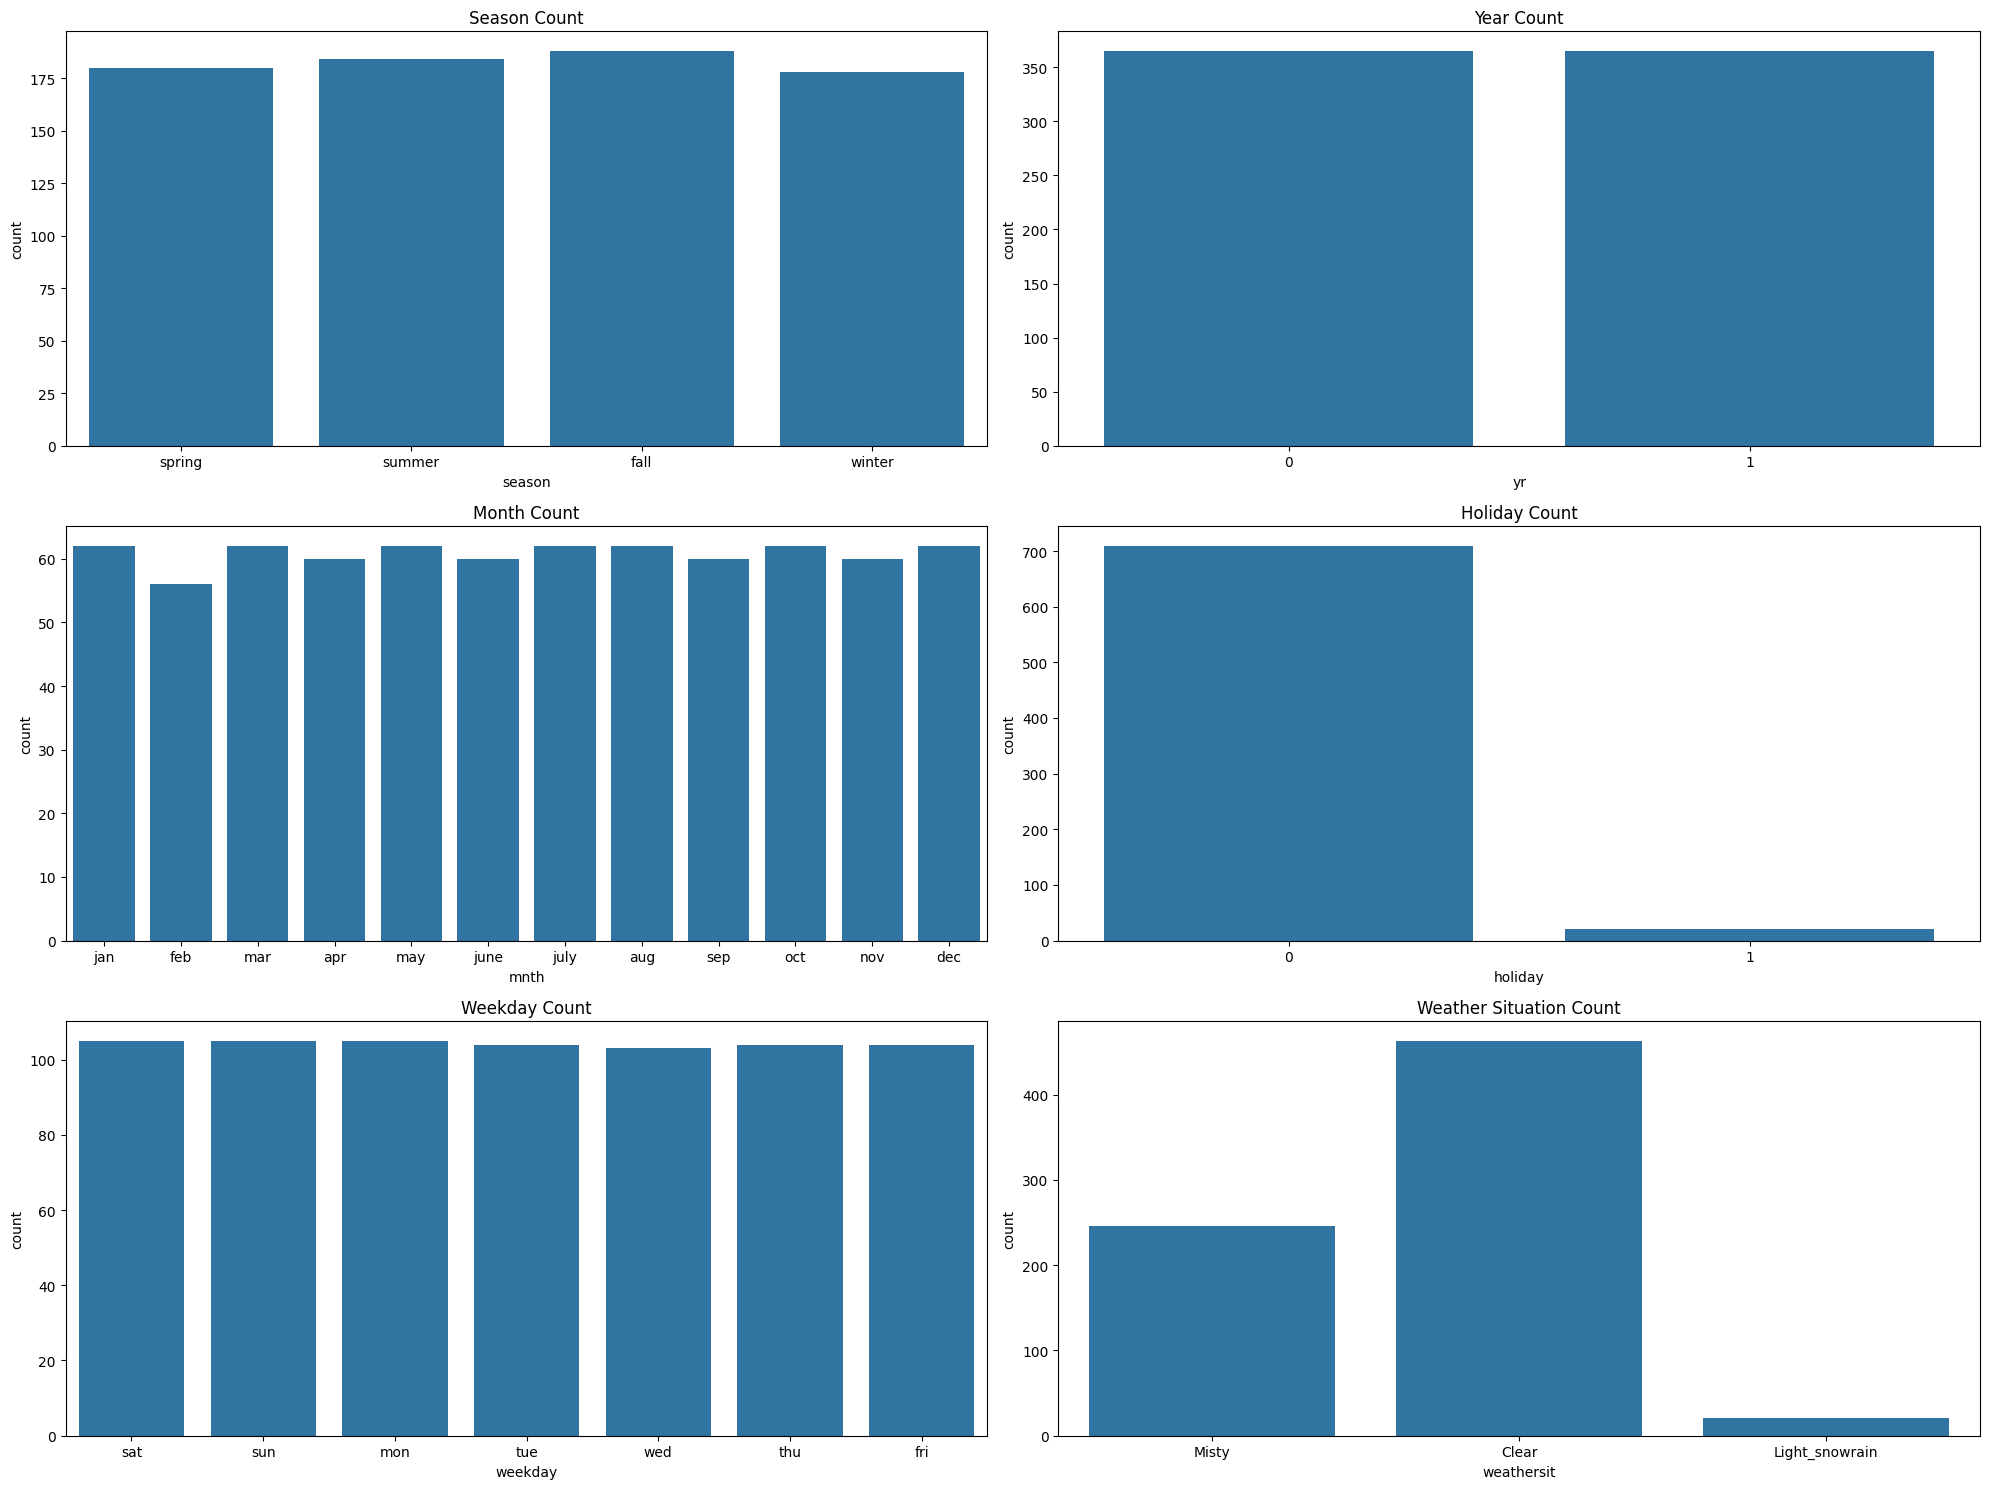

In [90]:
# Visualizing the categorical variables
plt.figure(figsize=(20, 15))

# Season
plt.subplot(3, 2, 1)
sns.countplot(x='season', data=bike)
plt.title('Season Count')

# Year
plt.subplot(3, 2, 2)
sns.countplot(x='yr', data=bike)
plt.title('Year Count')

# Month
plt.subplot(3, 2, 3)
sns.countplot(x='mnth', data=bike)
plt.title('Month Count')

# Holiday
plt.subplot(3, 2, 4)
sns.countplot(x='holiday', data=bike)
plt.title('Holiday Count')

# Weekday
plt.subplot(3, 2, 5)
sns.countplot(x='weekday', data=bike)
plt.title('Weekday Count')

# Weather Situation
plt.subplot(3, 2, 6)
sns.countplot(x='weathersit', data=bike)
plt.title('Weather Situation Count')

plt.tight_layout()
plt.show()

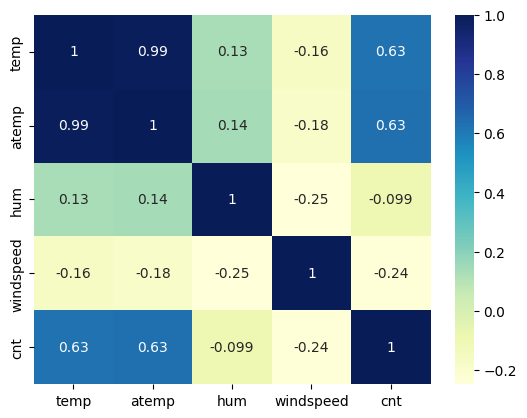

In [91]:
# checking the correlation between the columns
correlation_matrix = bike[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(correlation_matrix, cmap='YlGnBu', annot=True)
plt.show()

There is corelation present between temp and atemp variables. 

In [92]:
bike[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.991696
atemp,0.991696,1.000000


Create Dummy variables

In [93]:
mnth_dummy=pd.get_dummies(bike.mnth,drop_first=True)
weekdays_dummy=pd.get_dummies(bike.weekday,drop_first=True)
weathersit_dummy=pd.get_dummies(bike.weathersit,drop_first=True)
seasons_dummy=pd.get_dummies(bike.season,drop_first=True)

In [94]:
bike_df = pd.concat([bike,mnth_dummy,weekdays_dummy,weathersit_dummy,seasons_dummy],axis=1)

In [95]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,True,False,False,False,False,False,True,True,False,False
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,False,True,False,False,False,False,True,True,False,False
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,False,False,False,False,False,False,False,True,False,False
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,False,False,False,True,False,False,False,True,False,False
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,False,False,False,False,True,False,False,True,False,False


In [96]:
bike_df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [97]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    bool   
 9   dec             730 non-null    bool   
 10  feb             730 non-null    bool   
 11  jan             730 non-null    bool   
 12  july            730 non-null    bool   
 13  june            730 non-null    bool   
 14  mar             730 non-null    bool   
 15  may             730 non-null    bool   
 16  nov             730 non-null    bool   
 17  oct             730 non-null    boo

#### Splitting the Data 

In [98]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
bike_train, bike_test = train_test_split(bike_df, train_size = 0.7, random_state = 100)

In [99]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

In [100]:
# Fit and transform the data
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [101]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,False,False,...,False,False,False,True,False,False,False,False,False,False
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,False,False,...,True,False,False,False,False,False,True,True,False,False
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,False,True,...,False,True,False,False,False,False,False,True,False,False
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,False,False,...,True,False,False,False,False,False,True,False,True,False
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,False,False,...,False,False,False,False,False,False,True,False,True,False


In [102]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


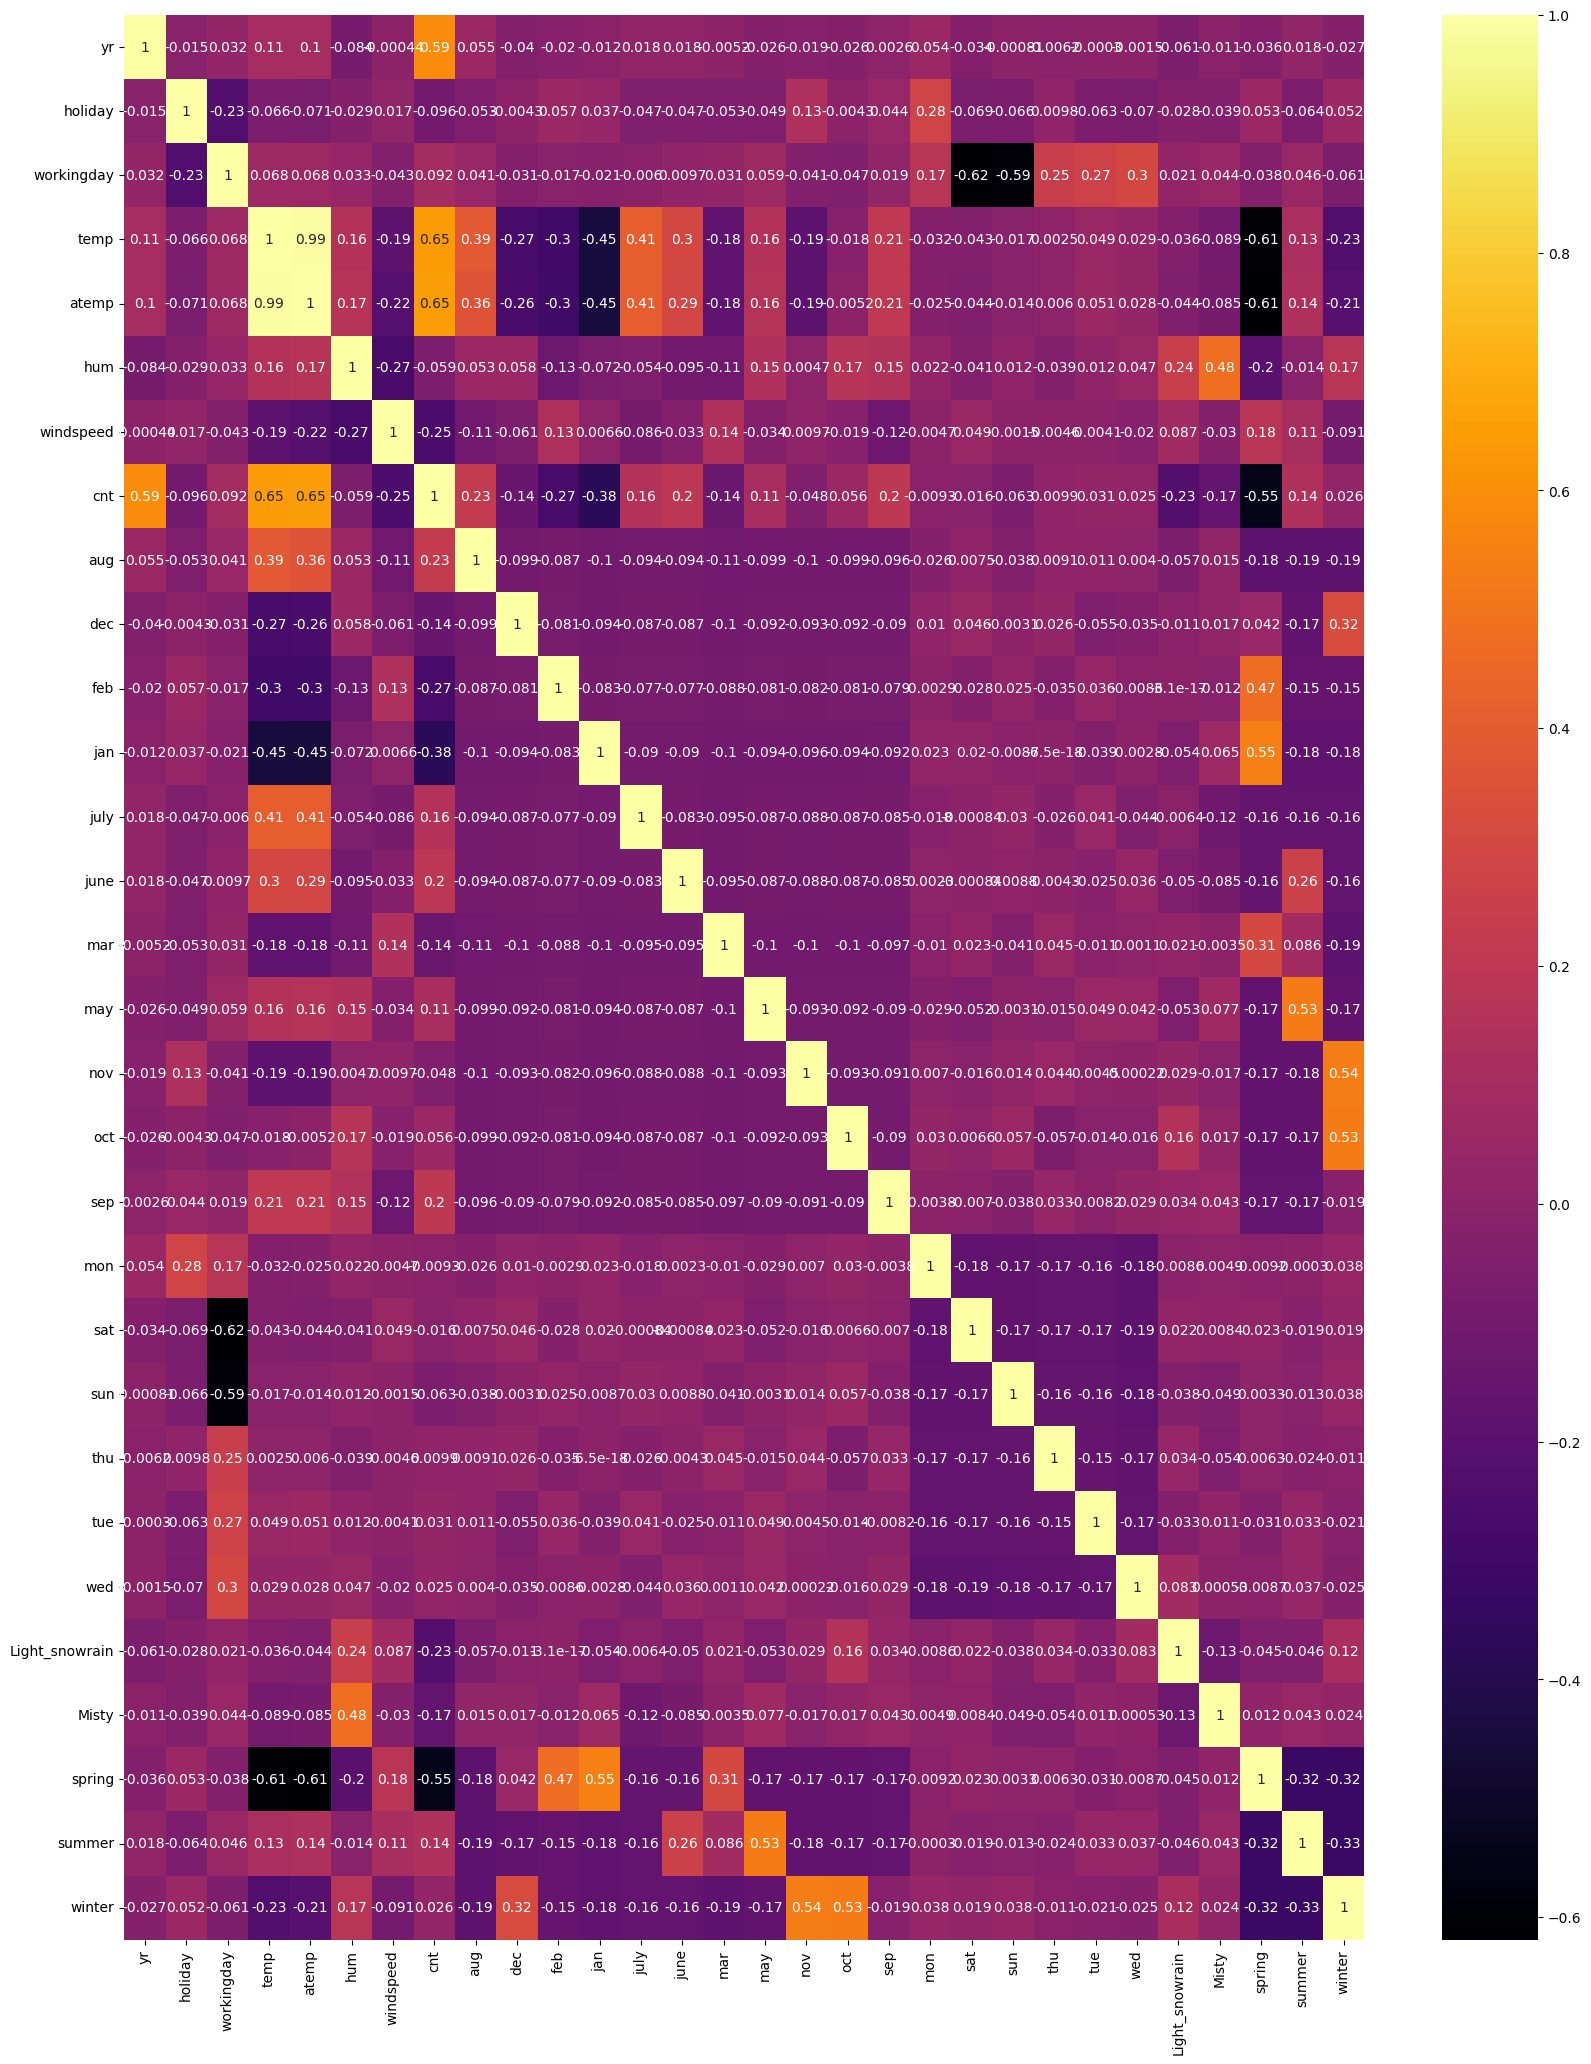

In [103]:
# Plot Corelation heatmap
plt.figure(figsize = (20, 25))
sns.heatmap(bike_train.corr(), annot = True, cmap="inferno")
plt.show()

Ther are temp, atem having most correlation

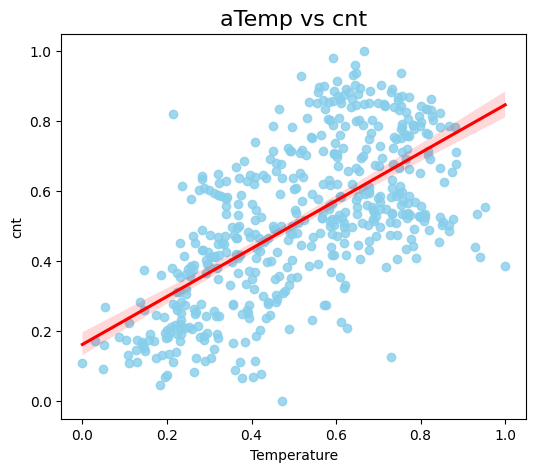

In [104]:
# visualizing correlation of temp vs cnt
plt.figure(figsize=(6,5))
plt.title("aTemp vs cnt", fontsize=16)
sns.regplot(data=bike_train, y="cnt", x="atemp", 
            scatter_kws={'color': 'skyblue'},  # Color of scatter points
            line_kws={'color': 'red'})  # Color of the regression line
plt.xlabel("Temperature")
plt.show()

In [105]:
y_train = bike_train.pop('cnt')
X_train = bike_train

Model Building

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# create a Linear Regression Model:
lm = LinearRegression()

# fit the model to the training data:
lm.fit(X_train, y_train)

# create RFE object:
rfe = RFE(lm, n_features_to_select=15)

rfe = rfe.fit(X_train, y_train)

In [107]:
# Selected variable via RFE
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [108]:
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [109]:
#  calculate VIF to variables:
def calculate_VIF(bike):
    vif = pd.DataFrame()
    vif['Features'] = bike.columns
    vif['VIF'] = [variance_inflation_factor(bike.values, i) for i in range(bike.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [110]:
X_train_rfe = X_train[col]

In [111]:
print(X_train_rfe.isnull().sum())

yr                0
holiday           0
workingday        0
temp              0
hum               0
windspeed         0
jan               0
july              0
sep               0
sat               0
Light_snowrain    0
Misty             0
spring            0
summer            0
winter            0
dtype: int64


In [112]:
X_train_rfe = X_train_rfe.astype({col: 'int64' for col in X_train_rfe.select_dtypes(include='bool').columns})

In [113]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
# building linear regression model:
X_train_lm1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train,X_train_lm1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          4.22e-191
Time:                        23:11:45   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.

In [114]:
# calculate VIF for the new model
calculate_VIF(X_train_rfe)

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Misty,2.29
0,yr,2.09
9,sat,1.98


workingday has highest VIF value

In [115]:
# remove 'workingday':
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)

In [116]:

X_train_lm2 = sm.add_constant(X_train_new)
lr2 = sm.OLS(y_train,X_train_lm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     191.1
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          3.10e-189
Time:                        23:11:46   Log-Likelihood:                 512.44
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     495   BIC:                            -931.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2920      0.035      8.

In [117]:
# calculate VIF
calculate_VIF(X_train_new)

,Features,VIF
3,hum,29.02
2,temp,16.75
4,windspeed,4.68
11,spring,4.35
13,winter,3.38
12,summer,2.79
10,Misty,2.29
0,yr,2.09
5,jan,1.67
6,july,1.59


hum has highest VIF vale 

In [118]:
X_train_new = X_train_new.drop(['hum'], axis = 1)

In [119]:
X_train_lm3 = sm.add_constant(X_train_new)
lr3 = sm.OLS(y_train,X_train_lm3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          2.48e-186
Time:                        23:11:46   Log-Likelihood:                 502.77
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2120      0.030      6.

In [120]:
calculate_VIF(X_train_new)

,Features,VIF
2,temp,5.16
3,windspeed,4.64
10,spring,2.76
11,summer,2.24
0,yr,2.07
12,winter,1.80
4,jan,1.61
5,july,1.59
9,Misty,1.56
6,sep,1.34


sat has highest p-value than temp.

In [121]:
X_train_new = X_train_new.drop(['sat'], axis = 1)

In [122]:
X_train_lm4 = sm.add_constant(X_train_new)
lr4 = sm.OLS(y_train,X_train_lm4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          8.14e-187
Time:                        23:11:46   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2154      0.030      7.

In [123]:
calculate_VIF(X_train_new)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
9,spring,2.75
10,summer,2.24
0,yr,2.07
11,winter,1.78
4,jan,1.61
5,july,1.59
8,Misty,1.56
6,sep,1.34


 jan has high p-value

In [124]:
X_train_new = X_train_new.drop(['jan'], axis = 1)

In [125]:
X_train_lm5 = sm.add_constant(X_train_new)
lr5 = sm.OLS(y_train,X_train_lm5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          5.06e-187
Time:                        23:11:46   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1994      0.030      6.

Residual Analysis

In [128]:
y_train_pred = lr5.predict(X_train_lm5)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,summer,2.23
8,spring,2.08
0,yr,2.07
10,winter,1.78
4,july,1.58
7,Misty,1.55
5,sep,1.34
6,Light_snowrain,1.08


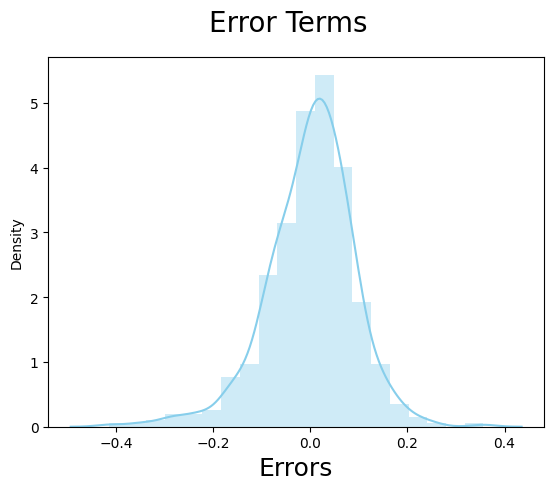

In [ ]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20,color='skyblue')
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)
calculate_VIF(X_train_new)

Residuals are normally distributed. 

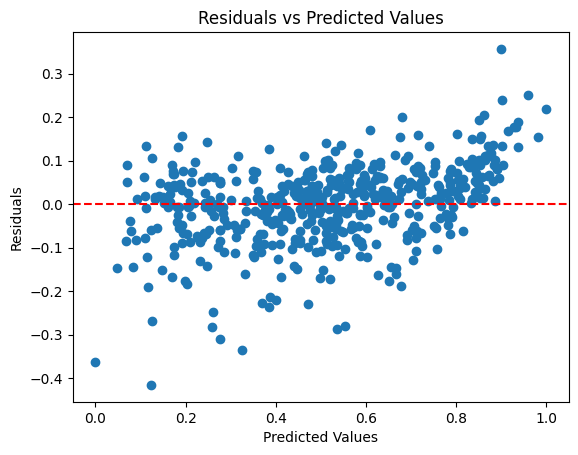

In [130]:
residual = (y_train - y_train_pred)
plt.scatter(y_train, residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

 The actual and predicted values for demand accumulated closely, showing that the model shows the changes in demand accurately.

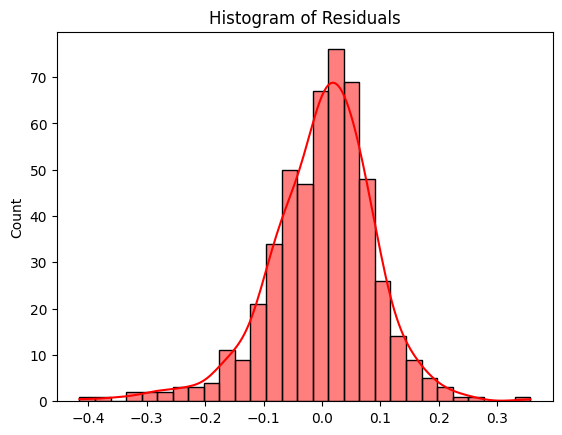

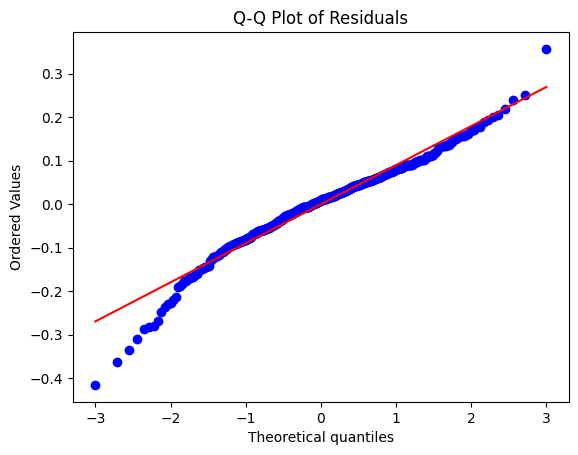

In [133]:
# Comapring plots with Q_Q plot
sns.histplot(residual, kde=True, color='red')
plt.title("Histogram of Residuals")
plt.show()

# Q-Q Plot
stats.probplot(residual, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

error terms follws normal distribution

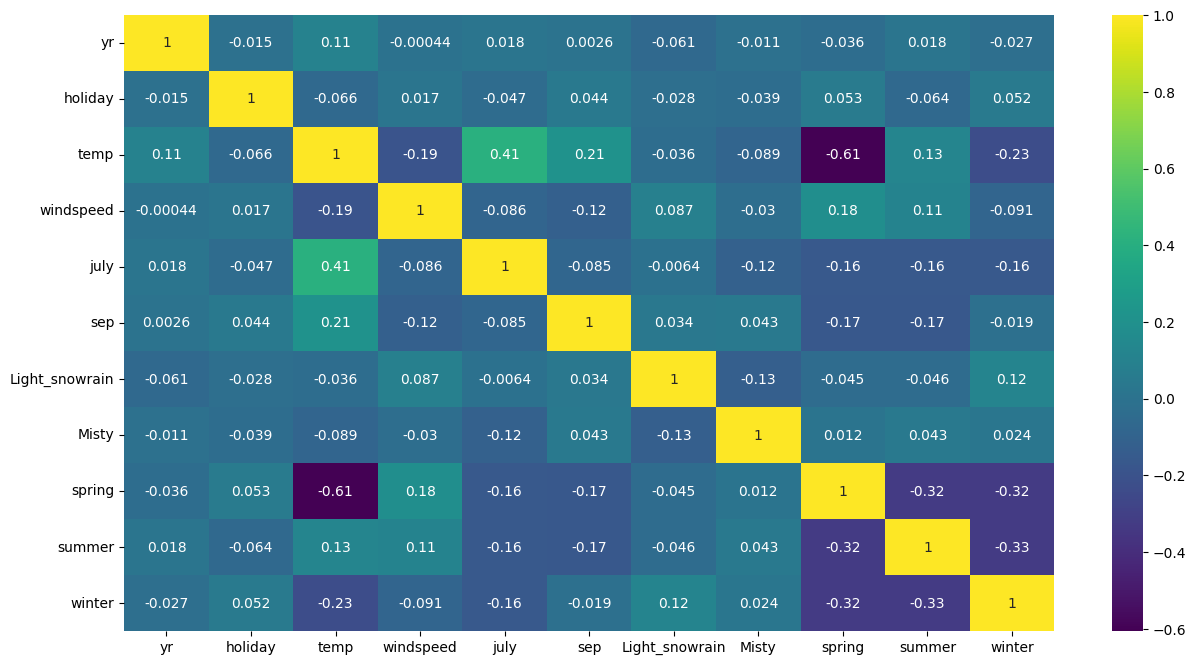

In [134]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap='viridis')
plt.show()

VIF values are below 5

In [135]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,False,False,...,False,False,False,False,False,False,True,False,False,False
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,False,False,...,False,False,False,False,True,False,False,False,True,False
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,False,False,...,False,False,True,False,False,False,True,False,False,True
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,True,False,...,False,False,False,False,True,False,False,False,False,False
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,False,False,...,False,False,True,False,False,False,False,False,True,False


In [136]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [137]:
col1 = X_train_new.columns
X_test = X_test[col1]
X_test_lm5 = sm.add_constant(X_test)

In [138]:
y_pred = lr5.predict(X_test_lm5)

In [140]:
from sklearn.metrics import r2_score
#Calculate Rsquare
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8053

Text(0, 0.5, 'y_pred')

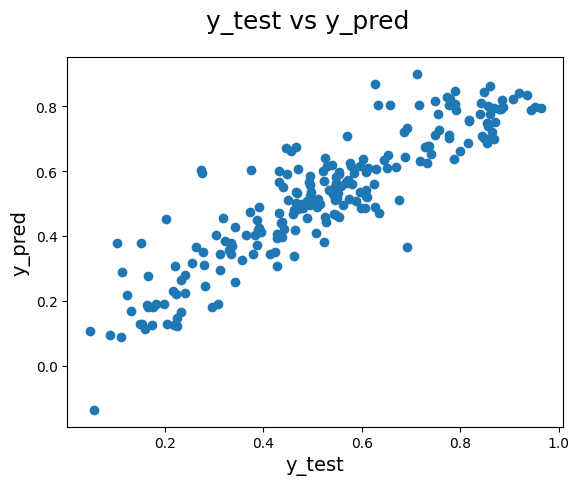

In [141]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 18)
plt.xlabel('y_test', fontsize = 14)
plt.ylabel('y_pred', fontsize = 14) 

In [142]:
# calculate Adjusted-R^2 value
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.795


In [144]:
round(lr5.params,4)

const             0.1994
yr                0.2336
holiday          -0.0975
temp              0.4910
windspeed        -0.1479
july             -0.0521
sep               0.0768
Light_snowrain   -0.2842
Misty            -0.0802
spring           -0.0672
summer            0.0465
winter            0.0817
dtype: float64

Understading the final coefficient output: -> round(lr5.params,4)
    const (0.1994): This is the intercept term. It represents the predicted value of the target variable (demand) when all other features are zero.
     yr (0.2336): This coefficient shows the effect of the year (possibly coded as 0 or 1) on the demand. 
     temp (0.4910): This indicates that an increase in temperature by one unit increases the demand by 0.5471 units, suggesting a positive relationship between temperature and bike demand.
     windspeed (-0.1479): A negative coefficien
    

Recomendation
	temp: Temperature has the highest positive coefficient, indicating that higher temperatures strongly correlate with increased bike demand. 
	yr: The year variable suggests a substantial positive trend in bike demand over time, with 2019 seeing higher usage than 2018.
    Light_snowrain has negative impact significantly reduces bike demand.